In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brainwave/emotions.csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/kaggle/input/brainwave/emotions.csv')

# Inspect the first few rows
print(data.head())

# Separate features and target
X = data.drop(columns=['label'])  # Assuming 'label' is the target column
y = data['label']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Handle missing values by imputing with the mean for numeric features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features (important for models like Logistic Regression and SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [3]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Print all results
    print("\nFinal Results for All Models:")
    for model, metrics in results.items():
        print(f"\nModel: {model}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    return results

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


Training Logistic Regression...
Logistic Regression Accuracy: 0.9766
Logistic Regression Precision: 0.9764
Logistic Regression Recall: 0.9760
Logistic Regression F1 Score: 0.9761
Training Time: 15.2226 seconds

Training Random Forest...
Random Forest Accuracy: 0.9883
Random Forest Precision: 0.9884
Random Forest Recall: 0.9879
Random Forest F1 Score: 0.9880
Training Time: 4.4888 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.9602
Decision Tree Precision: 0.9603
Decision Tree Recall: 0.9592
Decision Tree F1 Score: 0.9594
Training Time: 3.5331 seconds

Training KNN...
KNN Accuracy: 0.9321
KNN Precision: 0.9356
KNN Recall: 0.9296
KNN F1 Score: 0.9295
Training Time: 0.0044 seconds

Training SVM...
SVM Accuracy: 0.9766
SVM Precision: 0.9764
SVM Recall: 0.9762
SVM F1 Score: 0.9763
Training Time: 4.1465 seconds

Training AdaBoost...
AdaBoost Accuracy: 0.9110
AdaBoost Precision: 0.9159
AdaBoost Recall: 0.9085
AdaBoost F1 Score: 0.9088
Training Time: 55.2143 seconds

Training Gaus

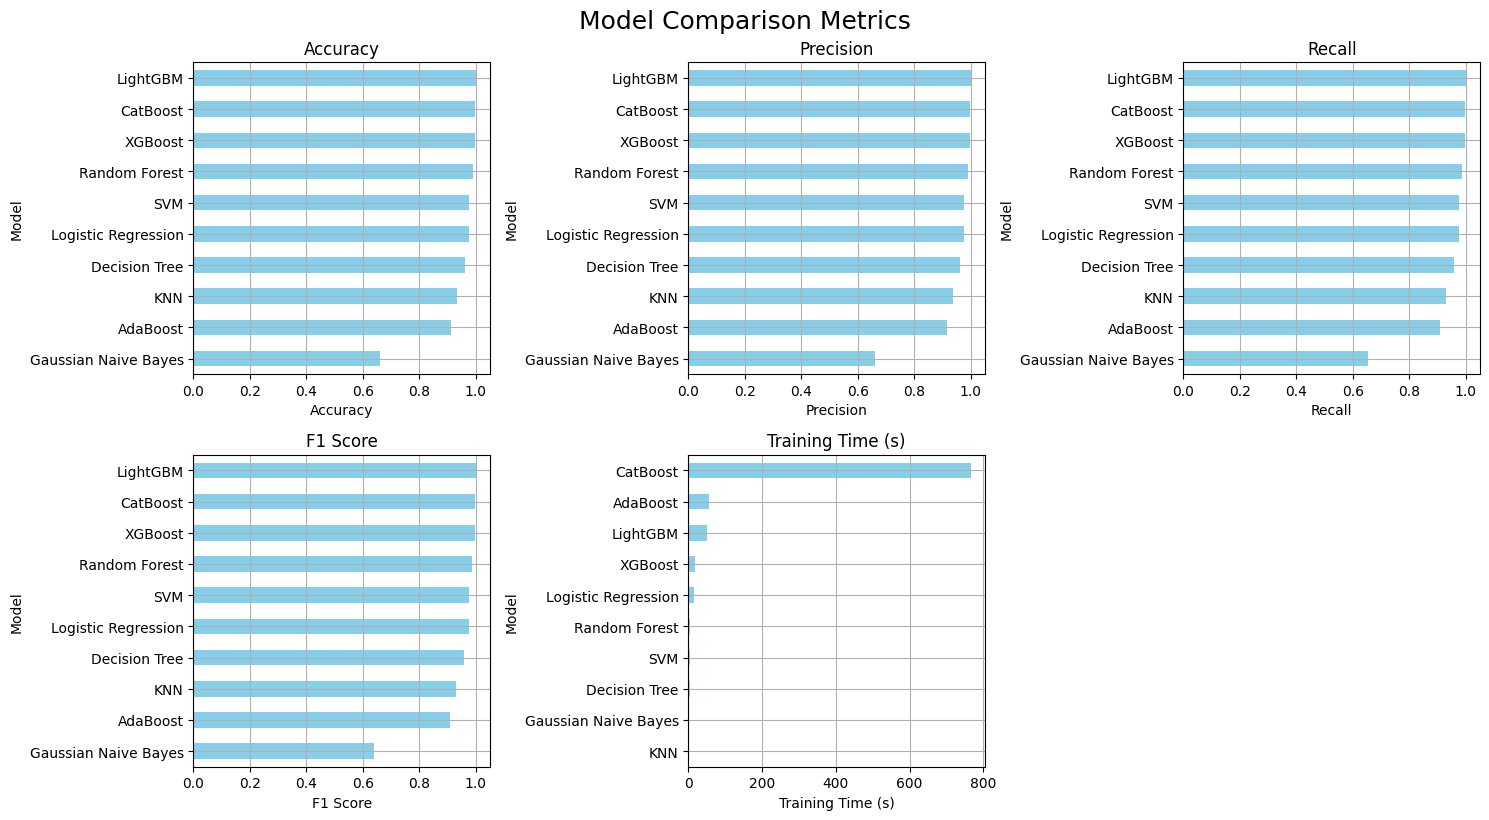

In [4]:
import matplotlib.pyplot as plt

# Convert results to a structured format for plotting
import pandas as pd

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results).T  # Transpose to get models as rows
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]

# Plot each metric
plt.figure(figsize=(15, 8))
for idx, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, idx+1)
    results_df[metric].sort_values().plot(kind='barh', color='skyblue')
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Model Comparison Metrics", fontsize=18, y=1.02)
plt.show()


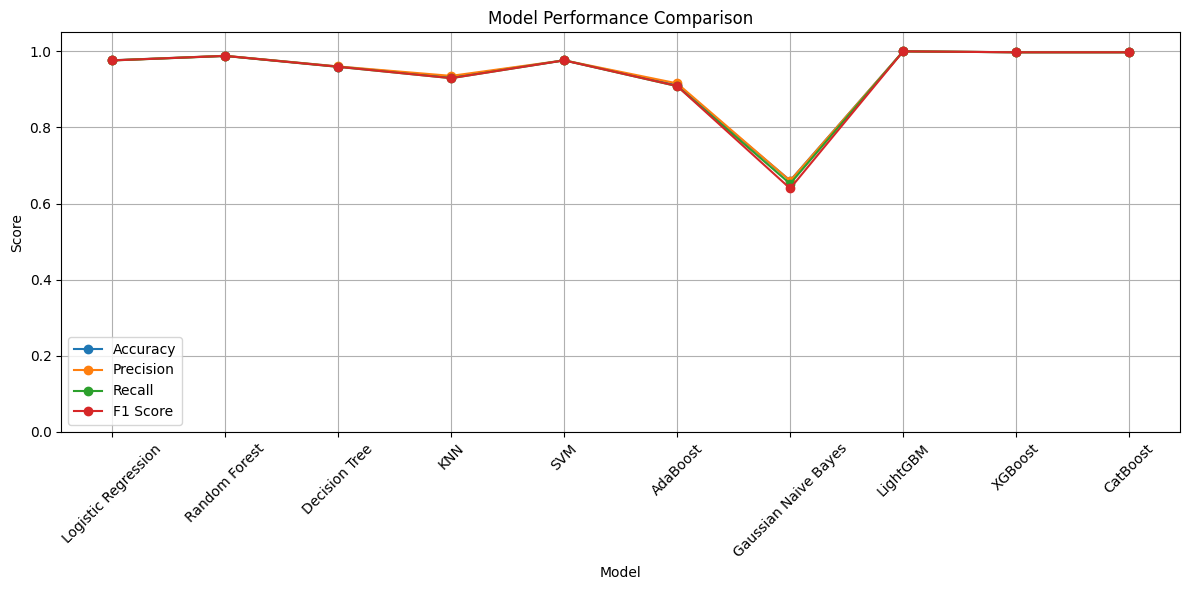

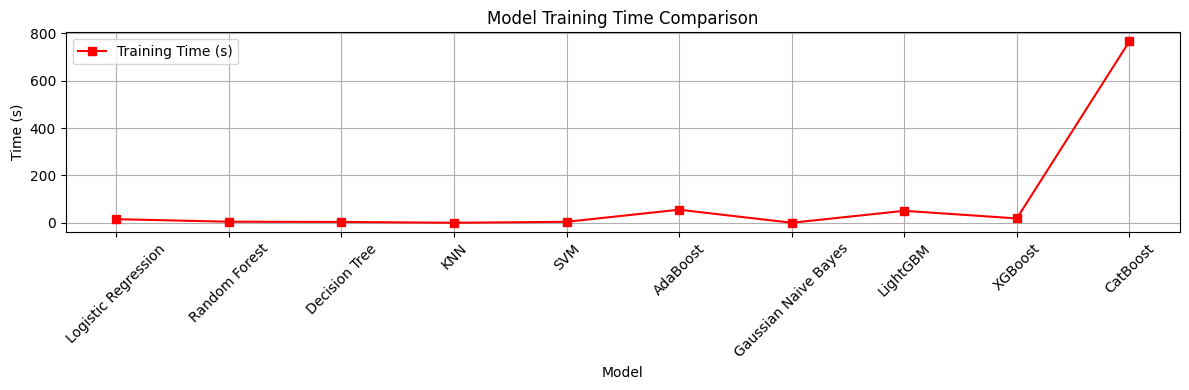

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T  # Transpose so models are rows

# Metrics to include
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Line Plot for Performance Metrics
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Line Plot for Training Time
plt.figure(figsize=(12, 4))
plt.plot(results_df.index, results_df["Training Time (s)"], marker='s', color='red', label='Training Time (s)')

plt.title("Model Training Time Comparison")
plt.xlabel("Model")
plt.ylabel("Time (s)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import Lasso
# Separate features (X) and labels (y)
X = data.drop(columns=['label'])  # Features
y = data['label']  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (NEGATIVE -> 0, NEUTRAL -> 1, POSITIVE -> 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check encoding mapping
print("Label Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Apply LASSO for feature selection
alpha = 0.09  # Regularization strength (adjust as needed)
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, y)

# Identify selected features (non-zero coefficients)
selected_features_indices = np.where(lasso.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]
print(f"Selected {len(selected_features)} features: {selected_features}")

Label Encoding Mapping: {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
Selected 19 features: Index(['mean_4_a', 'max_q_1_a', 'max_q_3_a', 'min_0_a', 'min_q_7_a',
       'logm_8_a', 'logm_9_a', 'logm_42_a', 'logm_64_a', 'entropy0_a',
       'fft_136_a', 'mean_4_b', 'max_q_3_b', 'max_q_13_b', 'logm_8_b',
       'logm_9_b', 'logm_42_b', 'logm_64_b', 'entropy0_b'],
      dtype='object')


In [7]:
# Subset the dataset with selected features
X = X_scaled[:, selected_features_indices]

# Split the feature-selected data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

# Define models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(kernel='linear', probability=True),
        "AdaBoost": AdaBoostClassifier(n_estimators=100),
        "Gaussian Naive Bayes": GaussianNB(),
        "LightGBM": lgb.LGBMClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(verbose=0)
    }

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = get_models()
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']
        f1 = report['macro avg']['f1-score']
        
        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Training Time (s)": training_time
        }
        
        # Print results
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"{name} Precision: {precision:.4f}")
        print(f"{name} Recall: {recall:.4f}")
        print(f"{name} F1 Score: {f1:.4f}")
        print(f"Training Time: {training_time:.4f} seconds\n")
    
    # Print all results
    print("\nFinal Results for All Models:")
    for model, metrics in results.items():
        print(f"\nModel: {model}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    return results

# Example usage (assuming X_train, X_test, y_train, y_test are defined)
results = train_evaluate_models(X_train, X_test, y_train, y_test)


Training Logistic Regression...
Logistic Regression Accuracy: 0.8946
Logistic Regression Precision: 0.8971
Logistic Regression Recall: 0.8931
Logistic Regression F1 Score: 0.8930
Training Time: 0.5757 seconds

Training Random Forest...
Random Forest Accuracy: 0.9789
Random Forest Precision: 0.9790
Random Forest Recall: 0.9785
Random Forest F1 Score: 0.9786
Training Time: 0.4734 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.9204
Decision Tree Precision: 0.9191
Decision Tree Recall: 0.9191
Decision Tree F1 Score: 0.9191
Training Time: 0.0222 seconds

Training KNN...
KNN Accuracy: 0.9508
KNN Precision: 0.9508
KNN Recall: 0.9508
KNN F1 Score: 0.9503
Training Time: 0.0006 seconds

Training SVM...
SVM Accuracy: 0.8970
SVM Precision: 0.9047
SVM Recall: 0.8940
SVM F1 Score: 0.8937
Training Time: 0.2230 seconds

Training AdaBoost...
AdaBoost Accuracy: 0.6581
AdaBoost Precision: 0.5333
AdaBoost Recall: 0.6437
AdaBoost F1 Score: 0.5459
Training Time: 0.4606 seconds

Training Gaussi

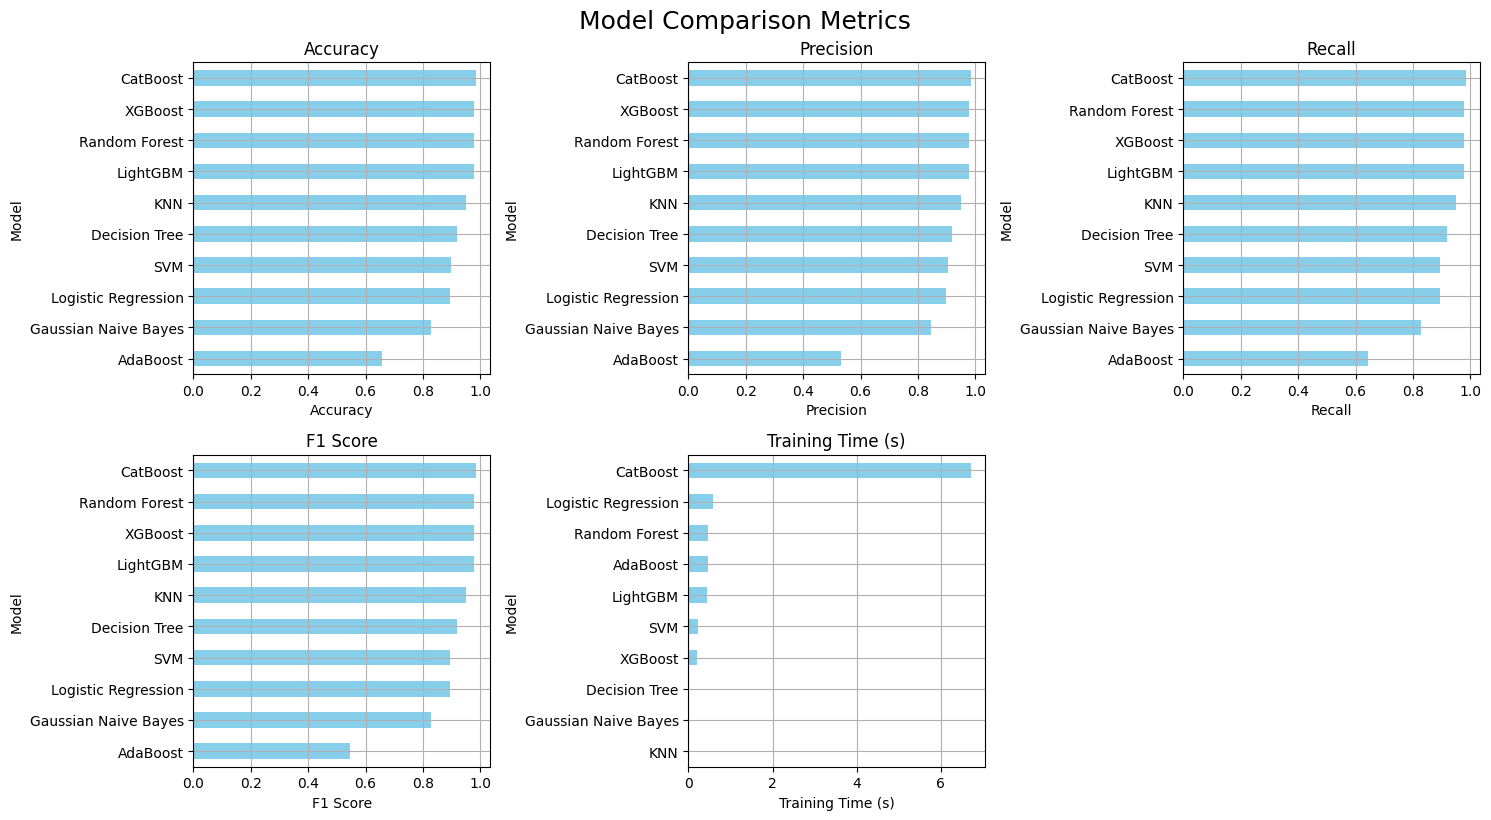

In [9]:
import matplotlib.pyplot as plt

# Convert results to a structured format for plotting
import pandas as pd

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results).T  # Transpose to get models as rows
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"]

# Plot each metric
plt.figure(figsize=(15, 8))
for idx, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, idx+1)
    results_df[metric].sort_values().plot(kind='barh', color='skyblue')
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Model Comparison Metrics", fontsize=18, y=1.02)
plt.show()


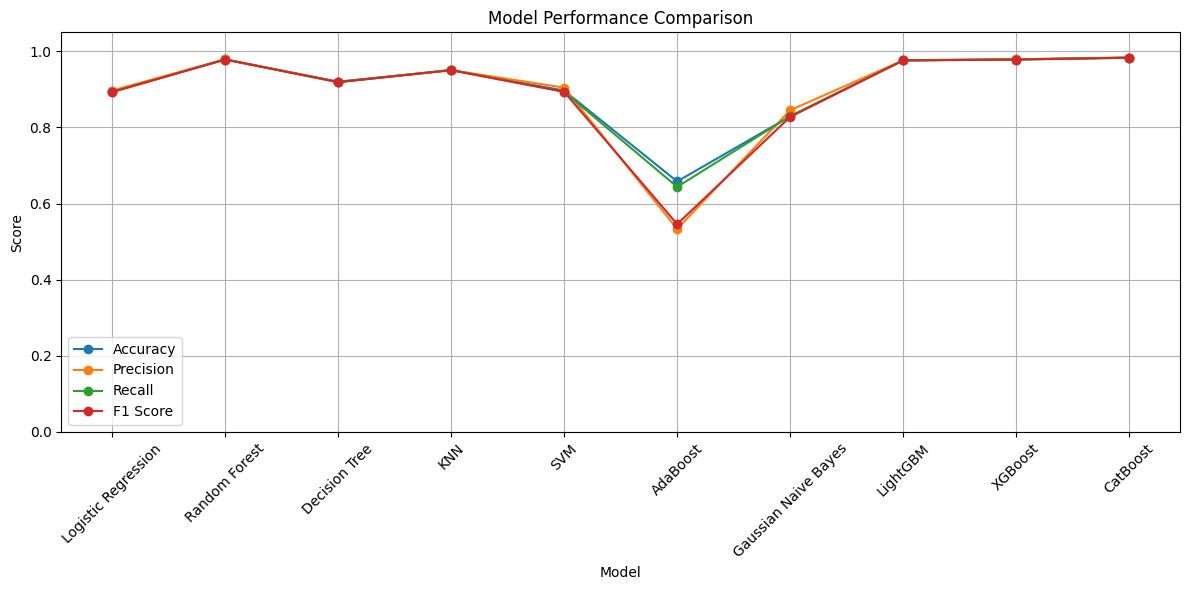

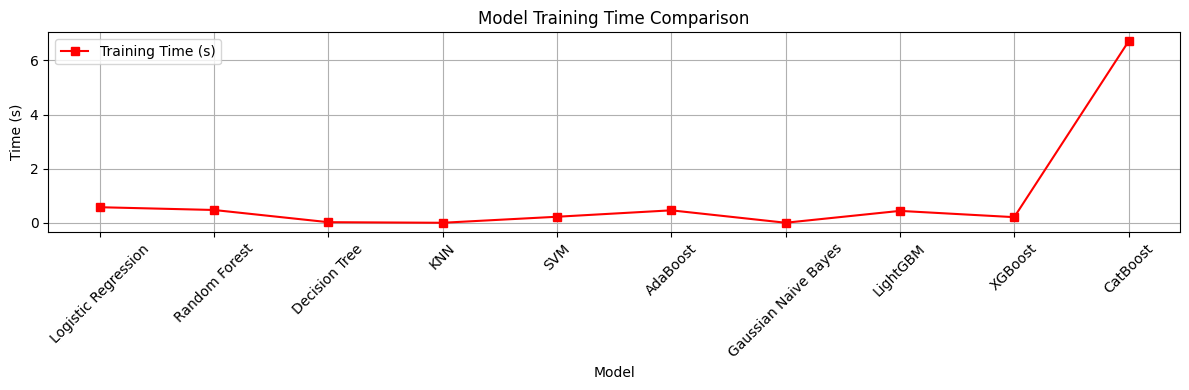

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T  # Transpose so models are rows

# Metrics to include
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Line Plot for Performance Metrics
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Line Plot for Training Time
plt.figure(figsize=(12, 4))
plt.plot(results_df.index, results_df["Training Time (s)"], marker='s', color='red', label='Training Time (s)')

plt.title("Model Training Time Comparison")
plt.xlabel("Model")
plt.ylabel("Time (s)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time


# Define a function to train and evaluate models
def train_and_evaluate_model(model, param_grid, model_name):
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    # Perform GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}: {best_params}")
    
    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {accuracy:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(conf_matrix)
    
    # Classification Report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Training time
    end_time = time.time()
    print(f"Total Training Time for {model_name}: {end_time - start_time:.2f} seconds")

# Define hyperparameter grids for each model
models = {
   
    "Random Forest": {
        "model": RandomForestClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(),
        "param_grid": {
            'C': [0.001, 0.01, 0.1, 1, 10, 75],
            'penalty': ['l1'],
            'solver': ['liblinear'],
            'max_iter': [100, 200, 300, 500]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            'n_neighbors': [1, 3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    "Decision Trees": {
        "model": DecisionTreeClassifier(),
        "param_grid": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2', None]
        }
    },
    "SVM": {
        "model": SVC(),
        "param_grid": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "param_grid": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    "GNB": {
        "model": GaussianNB(),
        "param_grid": {
            'priors': [None, [0.2, 0.3, 0.5], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]],
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
        }
    },
     "LightGBM": {
        "model": LGBMClassifier(),
        "param_grid": {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [5, 10],
            'num_leaves': [31, 63]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(),
        "param_grid": {
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.5, 0.7]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "param_grid": {
            'iterations': [50, 100],
            'learning_rate': [0.01, 0.1],
            'depth': [4, 6]
        }
    }
}

# Train and evaluate each model
for model_name, config in models.items():
    train_and_evaluate_model(config["model"], config["param_grid"], model_name)


Training Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy for Random Forest: 0.9859
Confusion Matrix for Random Forest:
[[142   0   1]
 [  0 147   1]
 [  4   0 132]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       1.00      0.99      1.00       148
           2       0.99      0.97      0.98       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

Total Training Time for Random Forest: 576.35 seconds

Training Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'max_iter': 200, 'penalty': 'l1', '

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Hyperparameters for Decision Trees: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy for Decision Trees: 0.9742
Confusion Matrix for Decision Trees:
[[138   1   4]
 [  0 146   2]
 [  2   2 132]]
Classification Report for Decision Trees:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.98      0.99      0.98       148
           2       0.96      0.97      0.96       136

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427

Total Training Time for Decision Trees: 336.40 seconds

Training SVM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy for SVM: 0.9836
Confusion Matrix for SVM:
[[140   0   3]
 [  0 146   2]
 [  

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Hyperparameters for CatBoost: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Test Accuracy for CatBoost: 0.9930
Confusion Matrix for CatBoost:
[[143   0   0]
 [  0 148   0]
 [  3   0 133]]
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       1.00      1.00      1.00       148
           2       1.00      0.98      0.99       136

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

Total Training Time for CatBoost: 1687.04 seconds


In [14]:
# Perform 5-fold cross-validation
# Define models with best hyperparameters
def get_best_models():
    return {
        "Logistic Regression": LogisticRegression(C=1, max_iter=500, penalty='l1', solver='liblinear'),
        "Random Forest": RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50),
        "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2),
        "KNN": KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform'),
        "SVM": SVC(C=10, gamma='scale', kernel='rbf', probability=True),
        "AdaBoost": AdaBoostClassifier(learning_rate=0.01, n_estimators=50),
        "Gaussian Naive Bayes": GaussianNB(priors=[0.1, 0.1, 0.8], var_smoothing=1e-05),
        "LightGBM": lgb.LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=31),
        "XGBoost": xgb.XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.7, use_label_encoder=False, eval_metric='logloss'),
        "CatBoost": cb.CatBoostClassifier(depth=6, iterations=100, learning_rate=0.1, verbose=0)
    }
def cross_validate_models(X, y):
    models = get_best_models()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    print("\n--- Performing 5-Fold Cross-Validation ---\n")

    for name, model in models.items():
        print(f"\nTraining {name} with 5-Fold Cross-Validation...")
        
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        training_times = []
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            # Train model
            start_time = time.time()
            model.fit(X_train_fold, y_train_fold)
            end_time = time.time()
            training_time = end_time - start_time
            
            # Make predictions
            y_pred_fold = model.predict(X_val_fold)
            
            # Calculate metrics
            acc = accuracy_score(y_val_fold, y_pred_fold)
            prec = precision_score(y_val_fold, y_pred_fold, average='weighted')
            rec = recall_score(y_val_fold, y_pred_fold, average='weighted')
            f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')
            
            accuracy_scores.append(acc)
            precision_scores.append(prec)
            recall_scores.append(rec)
            f1_scores.append(f1)
            training_times.append(training_time)
            
            # Print fold-wise results
            print(f"Fold-{fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1-Score={f1:.4f}, Training Time={training_time:.4f} sec")
        
        # Store average results
        results[name] = {
            "Avg Accuracy": np.mean(accuracy_scores),
            "Avg Precision": np.mean(precision_scores),
            "Avg Recall": np.mean(recall_scores),
            "Avg F1 Score": np.mean(f1_scores),
            "Avg Training Time (s)": np.mean(training_times)
        }
        
        # Print final average results for this model
        print(f"\n{name} Final Cross-Validation Results:")
        print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
        print(f"Avg Precision: {np.mean(precision_scores):.4f}")
        print(f"Avg Recall: {np.mean(recall_scores):.4f}")
        print(f"Avg F1 Score: {np.mean(f1_scores):.4f}")
        print(f"Avg Training Time: {np.mean(training_times):.4f} seconds\n")

    return results
from sklearn.model_selection import KFold
cv_results = cross_validate_models(X_scaled, y)


--- Performing 5-Fold Cross-Validation ---


Training Logistic Regression with 5-Fold Cross-Validation...
Fold-1: Accuracy=0.9836, Precision=0.9838, Recall=0.9836, F1-Score=0.9836, Training Time=1.6853 sec
Fold-2: Accuracy=0.9649, Precision=0.9651, Recall=0.9649, F1-Score=0.9649, Training Time=1.6035 sec
Fold-3: Accuracy=0.9648, Precision=0.9649, Recall=0.9648, F1-Score=0.9647, Training Time=1.5995 sec
Fold-4: Accuracy=0.9859, Precision=0.9860, Recall=0.9859, F1-Score=0.9859, Training Time=1.7235 sec
Fold-5: Accuracy=0.9836, Precision=0.9843, Recall=0.9836, F1-Score=0.9835, Training Time=1.7161 sec

Logistic Regression Final Cross-Validation Results:
Avg Accuracy: 0.9766
Avg Precision: 0.9769
Avg Recall: 0.9766
Avg F1 Score: 0.9765
Avg Training Time: 1.6656 seconds


Training Random Forest with 5-Fold Cross-Validation...
Fold-1: Accuracy=0.9883, Precision=0.9883, Recall=0.9883, F1-Score=0.9883, Training Time=2.2865 sec
Fold-2: Accuracy=0.9789, Precision=0.9790, Recall=0.9789, F1-Score